In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import spacy 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [8]:
import preprocessor as p

In [9]:
nlp = spacy.load("en")
from spacy.lang.en.stop_words import STOP_WORDS

In [10]:
data = pd.read_pickle('OLID_data.pkl')

In [11]:
data2 = pd.read_pickle('second_data_cleaned.pkl')

In [12]:
data.head(5)

,text,label
0,democrats support antifa muslim brotherhood is...,1
1,revered conservatives hated progressivessocial...,0
2,first reduces the,0
3,getting the news that she still for parole alw...,0
4,unity demo oppose the farright enough enough,1


In [13]:
data.shape

(14100, 2)

In [14]:
data['label'].value_counts()

0    9460
1    4640
Name: label, dtype: int64

In [15]:
data2.head(5)

,text,label
14651,gator needs his gat punk ass bitch,1
4733,you did you crushed his got exotic bitch dreams,1
1510,dont get bro when bae textin another nigger,1
3388,bitch you know you wont this,1
2779,weeknd make muzik for the hoes tryna meet thes...,1


In [16]:
data2['label'].value_counts()

1    8983
0    4163
Name: label, dtype: int64

In [17]:
# merge 2 data set

frames = [data, data2]

all_data = pd.concat(frames)

In [18]:
all_data.shape

(27246, 2)

In [19]:
all_data['label'].value_counts()

1    13623
0    13623
Name: label, dtype: int64

# the number of offensive and non-offensive tweets in the combined dataset

In [20]:
all_data['label'].value_counts()

1    13623
0    13623
Name: label, dtype: int64

In [21]:
offensive_data = all_data[all_data['label']==1]
offensive_data.shape

(13623, 2)

In [22]:
offensive_data.head(5)

,text,label
0,democrats support antifa muslim brotherhood is...,1
4,unity demo oppose the farright enough enough,1
5,what the fuck did this time,1
7,you get the feeling kissing behind can humilia...,1
14,nigga ware hits,1


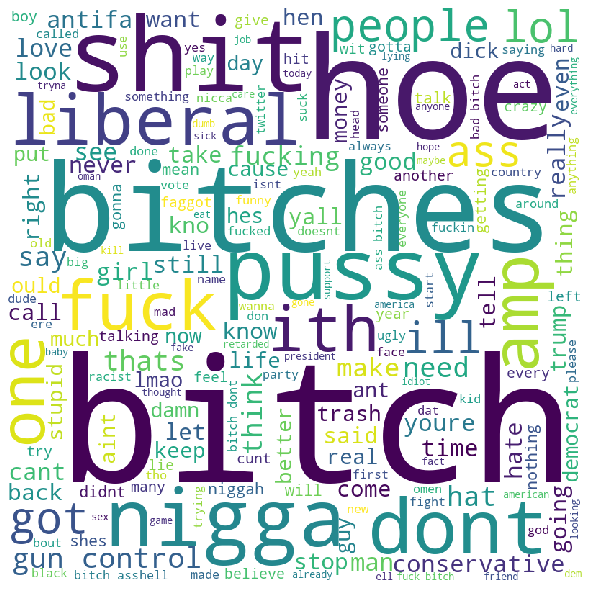

In [40]:
# wordcloud for offensive tweets

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"train_df.csv", encoding ="latin-1") 
df = offensive_data['text']  
comment_words = '' 
stopwords = set(STOPWORDS)   
for val in df:  
    val = str(val)       
    tokens = val.split()       
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens)+" "  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.save("word_cloud.jpeg")
plt.savefig('offensive_words.png')
  
plt.show() 




In [23]:
# train and test data 
X_train, X_test, y_train, y_test = train_test_split(all_data['text'], all_data['label'], test_size=0.3, random_state=42)

In [24]:
sum(y_test)

4071

In [25]:
len(y_test)

8174

In [26]:
print (4071/8174)

0.49804257401517005


In [27]:
sum(y_train)

9552

In [28]:
len(y_train)

19072

In [29]:
9552/19072

0.5008389261744967

In [30]:
y_train.shape

(19072,)

In [31]:
y_test.shape

(8174,)

In [32]:
# lemmatization with Spacy 

def tokenize_lemma(text):
    return [w.lemma_.lower() for w in nlp(text)]

In [33]:
stop_words_lemma = set(tokenize_lemma(' '.join(STOP_WORDS)))

In [34]:
stop_words_lemma

{"'",
 "'s",
 '-pron-',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'around',
 'as',
 'at',
 'back',
 'be',
 'because',
 'become',
 'before',
 'beforehand',
 'behind',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'could',
 'd',
 'do',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'go',
 'have',
 'hence',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'how'

# uising TF/IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from spacy.lang.en.stop_words import STOP_WORDS

ng_tfidf=TfidfVectorizer(                            
                         stop_words=stop_words_lemma,
                         tokenizer=tokenize_lemma,
                         token_pattern=None
                         
                        )
                         
                         
ng_tfidf=ng_tfidf.fit_transform(X_train )

In [59]:
ng_stem_vocab = ng_tfidf.get_feature_names()
ng_stem_vocab 

AttributeError: get_feature_names not found

In [ ]:
#ng_tfidf=ng_tfidf.fit_transform(X_train)


In [ ]:
ng_tfidf.shape

# Naive Bayes Classifiyer

In [60]:
# Naive bayes 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


text_clf = Pipeline([
   ('vect', TfidfVectorizer (stop_words=stop_words_lemma, 
                             tokenizer=tokenize_lemma,
                             token_pattern=None
                             )),    
  
   ('clf', MultinomialNB())
 ])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={"'", "'d", "'s", '-pron-', 'a',
                                             'about', 'above', 'across',
                                             'after', 'afterwards', 'again',
                                             'against', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always',
                                             'among', 'amongst', 'amount', 'an',
                                             'and', 'another', 'any', 'anyhow',
                                             'anyone', 'anything', ...},
                                 token_pattern=None,
                                 tokenizer=<function tokenize_lemma at 0x7f16fa75f680>)),
                ('clf', MultinomialNB())])

In [61]:
predicted = text_clf.predict( X_test)

In [62]:
np.mean(predicted == y_test)

0.8056031318815757

# confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predicted),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,3350,753
class 1 actual,836,3235


# F1 Score

In [64]:
from sklearn.metrics import f1_score
score = f1_score(y_test, predicted, average='macro')
print('F1-score: %.3f' % score)

F1-score: 0.806


In [65]:
from sklearn.metrics import classification_report
ypred = text_clf.predict(X_test)
print(classification_report(y_test, ypred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4103
           1       0.81      0.79      0.80      4071

    accuracy                           0.81      8174
   macro avg       0.81      0.81      0.81      8174
weighted avg       0.81      0.81      0.81      8174



# Logistic Regression 


In [ ]:
 #{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
text_LR = Pipeline([
     #('vect', CountVectorizer(stop_words='english')),
     ('vect', TfidfVectorizer (stop_words=stop_words_lemma, 
                               tokenizer=tokenize_lemma,
                               token_pattern=None
                              )),    
     ('clf',  LogisticRegression())
     ])


text_LR.fit(X_train, y_train)


Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={"'", "'d", "'s", '-pron-', 'a',
                                             'about', 'above', 'across',
                                             'after', 'afterwards', 'again',
                                             'against', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always',
                                             'among', 'amongst', 'amount', 'an',
                                             'and', 'another', 'any', 'anyhow',
                                             'anyone', 'anything', ...},
                                 token_pattern=None,
                                 tokenizer=<function tokenize_lemma at 0x7f10910c6050>)),
                ('clf', LogisticRegression())])

In [35]:
predicted = text_LR.predict( X_test)

In [36]:
np.mean(predicted == y_test)

0.8531930511377539

# Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predicted),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,3952,217
class 1 actual,983,3022


# Classification Report 


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4169
           1       0.93      0.75      0.83      4005

    accuracy                           0.85      8174
   macro avg       0.87      0.85      0.85      8174
weighted avg       0.87      0.85      0.85      8174



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import GridSearchCV

text_rf = Pipeline([
     ('vect', TfidfVectorizer (stop_words=stop_words_lemma, 
                               tokenizer=tokenize_lemma,
                               token_pattern=None
                              )),    
     ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 50 , class_weight='balanced'))])

#rf_gs = GridSearchCV(text_rf, 
#                     cv=5, 
#                     param_grid={'rf__max_depth': range(3, 20)}
#                    )

text_rf.fit(X_train, y_train)



In [ ]:
predicted = text_rf.predict( X_test)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
param_grid = {
     #'bootstrap': [True],
     'max_depth': [50, 80, 100],
     #'max_features': [2, 3],
     #'min_samples_leaf': [3, 4, 5],
     #'min_samples_split': [8, 10, 12],
     #'n_estimators': [100, 200, 500, 1000] 
        
}

gs = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5, 
    n_jobs=-1,
)


text_rf = Pipeline([
     ('vect', TfidfVectorizer (stop_words=stop_words_lemma, 
                               tokenizer=tokenize_lemma,
                               token_pattern=None
                              )),    
     ('gs', gs)
     ])

In [36]:
text_rf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={"'", "'s", '-pron-', 'a', 'about',
                                             'above', 'across', 'after',
                                             'afterwards', 'again', 'against',
                                             'all', 'almost', 'alone', 'along',
                                             'already', 'also', 'although',
                                             'always', 'among', 'amongst',
                                             'amount', 'an', 'and', 'another',
                                             'any', 'anyhow', 'anyone',
                                             'anything', 'anyway', ...},
                                 token_pattern=None,
                                 tokenizer=<function tokenize_lemma at 0x7fe3c12fa950>)),
                ('gs',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              n_jobs=-1,
         

In [37]:
gs.best_params_

{'max_depth': 100}

In [38]:
predicted = text_rf.predict( X_test)

# Classification Report 


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, labels =[0,1])) 

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      4103
           1       0.95      0.74      0.83      4071

    accuracy                           0.85      8174
   macro avg       0.87      0.85      0.85      8174
weighted avg       0.87      0.85      0.85      8174



# confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predicted),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,3938,165
class 1 actual,1078,2993


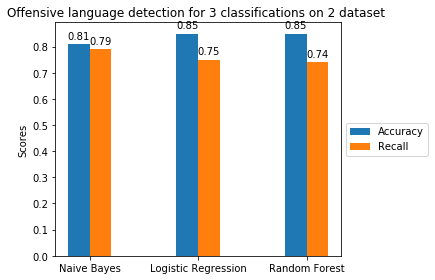

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Naive Bayes','Logistic Regression','Random Forest']
Accuracy = [0.81, 0.85, 0.85 ]
Recall   = [0.79, 0.75, 0.74]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Accuracy, width, label='Accuracy')
#rects2 = ax.bar(x + width/2, F1_score, width, label='F1-Score')
rects2 = ax.bar(x  + width/2, Recall  , width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Offensive language detection for 3 classifications on 2 dataset ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

measurments = ['Accuracy', 'Recall']
#plt.legend(Gender,loc=2)
legend_x = 1
legend_y = 0.5
plt.legend(["Accuracy", "Recall"], loc='center left', bbox_to_anchor=(legend_x, legend_y))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()
plt.savefig('classifier_comparision_twoDataset.svg')

plt.show()